<a id='step13'></a>

# Содержание
<br>[ `1`__Функция настройки, очистки, корректировки данных в таблицах model и chenk__](#step1)
<br>[ `2` __Разбиение на выборки__](#step2) 
<br>[ `3` __Обучение моделей__](#step3)
<br>[ `4` __Таблица результатов__](#step4) 
<br>[ `5` __Создание предсказаний для chenk__](#step5)
<br>[ `6` __Общий вывод__](#step6)


 <div style="border:solid green 2px; padding: 20px">
    
 <div style="border:solid green 2px; padding: 20px">
    
   
      
#### Решение кейса :<br>
- ● Создание кода для предсказания заряда второго электрона Q2.<br>
- ● Создание презентации для объяснения работы кода в случае выхода на
финальную защиту.<br>
     
#### Данные для хакатона:<br>
Для новичков (https://www.kaggle.com/t/fb890651255f44cd8dc61a000fab8878)<br>
Для продолжающих (https://www.kaggle.com/t/5a518661b0744c01bad99bd01eaa1e4e)<br>
     
#### Описание данных<br>
Для работы вам представлены данные из исследований ЦЕРН.
Значения столбцов в данных:<br>
- ● Run: серийный номер произошедшего события.<br>
- ● Event: номер произошедшего события.<br>
- ● E1, E2: энергия первого и второго электрона соответственно, измеренная в GeV.<br>
- ● px1, py1, pz1, px2, py2, pz2: компоненты импульса по осям для первого и<br>
второго электрона соответственно, измеренные в GeV.<br>
- ● pt1, pt2: поперечные импульсы для первого и второго электрона соответственно,<br>
измеренные в GeV.<br>
- ● eta1, eta2: псевдобыстрота для первого и второго электрона соответственно.<br>
- ● phi1, phi2: φ-углы для первого и второго электрона соответственно.<br>
- ● Q1, Q2: заряды первого и второго электрона соответственно.<br>

- ● M: инвариантная масса первого и второго электрона вместе, измеренная в GeV<br>
<br>
`Оценка итоговых результатов и определение победителей:` <br>
<br>
***Качество решений оценивается по метрике `F-мера`.*** <br>

Подробнее про метрику можно узнать в официальной документации:<br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html.<br>
<br>     
- ● __Задача — получить как можно более высокий результат на лидерборде.__
 
</div> 
</div>

In [1]:
import pandas as pd 
import numpy as np
from IPython.display import display
import seaborn as sn # подключение графической библиотеки seaborn
import matplotlib.pyplot as plt #импортируем библиотеку для графиков matplotlib 
from PIL import Image # модуль  загрузки изображений из файлов и создания новых изображений.
from matplotlib.pyplot import figure
import warnings # игнор ошибок
warnings.simplefilter('ignore')# отменяет вывод таблицы предупреждения ошибки
%matplotlib inline

# Импорты для моделей
from sklearn.ensemble import RandomForestRegressor # Импорт модель RandomForestRegressor из библиотеки sklearn
from sklearn.tree import DecisionTreeRegressor # Импорт модель DecisionTreeRegressor из библиотеки sklearn
from sklearn.linear_model import LinearRegression # Импорт модель LinearRegression из библиотеки sklearn
import lightgbm as lgb # Импорт Light GBM
import catboost as cb # Импорт CatBoost

from sklearn.model_selection import train_test_split # функция train_test_split разделение выборок
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV,RandomizedSearchCV # Импортируем функцию TimeSeriesSplit и GridSearchCV 
from statsmodels.tsa.seasonal import seasonal_decompose # метод разложение временных рядов
from sklearn.metrics import make_scorer # Импорт функцию make_scorer из библиотеки sklearn
from sklearn.model_selection import cross_val_score # Импорт функцию cross_val_score из библиотеки sklearn
from sklearn.metrics import mean_squared_error #Импортирую метрику mean_squared_error из библиотеки sklearn
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import StratifiedKFold

# Импорты для нейронной  модели
from keras import models
from keras import layers
from tensorflow.keras.optimizers import Adam # - Works

# from tqdm import notebook # индикатор прогресса
# %%script false # Пропустить выполнение ячейки
# raise SystemExit("Stop right there!") остановить выполнение ячейки
import time
def exec_time(start, end):
   diff_time = end - start
   m, s = divmod(diff_time, 60)
   h, m = divmod(m, 60)
   s,m,h = int(round(s, 0)), int(round(m, 0)), int(round(h, 0))
   print("Время выполнения кода: " + "{0:02d}:{1:02d}:{2:02d}".format(h, m, s))
start = time.time()

In [2]:
model = pd.read_csv('C:/Users/Infoworker/YandexDisk-infomes@yandex.ru/1.3 Машинное обучение наука о данных/2 Академия Сбер/0 Хакатон/1 SCIENCEHack/model.csv')
check = pd.read_csv('C:/Users/Infoworker/YandexDisk-infomes@yandex.ru/1.3 Машинное обучение наука о данных/2 Академия Сбер/0 Хакатон/1 SCIENCEHack/check.csv')

<a id='step1'></a>
[***&#10224;***](#step13) <a class="tocSkip">

### Функция настройки, очистки, корректировки данных в таблицах model и chenk

In [3]:
def df_0(data_0,name):# функция df_0 для обработки признаков  выбранного датасета
    begin= data_0 # сохраним датасет перед предобработкой в begin  
    # №1 Заполнение пропусков
    #data_0= data_0.fillna(data_0.mean()) # заполнение пропусков средним значением
    data_0= data_0.bfill().ffill() #  заливка обнаруженных пропусков в столбцах  по соседним результатам
    #data_0 = data_0.fillna(0)  # методом fillna заполним оставшиеся пропуски значением 0

    # №2 Удаление выбросов
#     data_0 =  data_0.loc[(data_0['Event'] < 1000000000)&(data_0['E1'] < 100) &(data_0['px1'] < 25)&(data_0['px1'] > -25)
#                         &(data_0['py1'] < 25)&(data_0['py1'] > -25)&(data_0['pt1'] < 40)&(data_0['E2'] < 210)
#                         &(data_0['px2'] < 35)&(data_0['px2'] > -35)&(data_0['py2'] < 30)&(data_0['py2'] > -30)
#                         &(data_0['pz2'] < 250)&(data_0['pz2'] > -250) &(data_0['pt2'] < 70)
#                         &(data_0['eta2'] < 3) &(data_0['eta2'] > -3.5)&(data_0['E2'] < 150) &(data_0['M'] < 80)] 
#     data_0 =  data_0.loc[(data_0['Event'] < 1250000000)&(data_0['E1'] < 200) &(data_0['px1'] < 50)&(data_0['px1'] > -50)
#                             &(data_0['py1'] < 50)&(data_0['py1'] > -50)&(data_0['pt1'] < 50)&(data_0['E2'] < 300)
#                             &(data_0['px2'] < 70)&(data_0['px2'] > -70)&(data_0['py2'] < 60)&(data_0['py2'] > -60)
#                             &(data_0['pz2'] < 250)&(data_0['pz2'] > -250) &(data_0['pt2'] < 70)
#                             &(data_0['eta2'] < 3) &(data_0['eta2'] > -3.5)] 
    
    # check['eta2'] не совпадает с model['eta2'] надо решить, что делать с этим признаком.
    #check = check.query("eta2 !=0.000051")
    #check = check.loc[check['eta2'] != 0.000051]
    #check =  check.loc[(check['eta2'] < 3) &(check['eta2'] > 1)]
    
    # №3 Удаление сильно коррелирующих признаков
    #data_0 = data_0.drop(['pz1','pt2','pz2'], axis=1)
    # # кандидаты на удалелние в таблице model
    
    # №4 Удаление дубликатов
    data_0 = data_0.drop_duplicates()
        
    if name == 'model':
        #data_0 = data_0.drop(['pz1','pt2','pz2','eta2'], axis=1)# удаление сильно коррелирующих признаков в таблице model
        # 'eta2' кандидат на удаления из-за неправильного распределения в таблицах model и check
        df_model = data_0
        print('Изначальный размер таблицы model',begin.shape)
        print('Размер таблицы model после удаления выбросов',df_model.shape)
        return df_model
    else:
        #data_0 = data_0.drop(['pz1','pt2','pz2','eta2'], axis=1)# удаление сильно коррелирующих признаков в таблице check
        # 'eta2' кандидат на удаления из-за неправильного распределения в таблицах model и check
        #data_0 =  data_0.loc[(data_0['eta2'] < 3) &(data_0['eta2'] > 1)] # удаление выброса 0.000051 в check['eta2']
        df_check = data_0
        print('Изначальный размер таблицы check',begin.shape)
        print('Размер таблицы check после удаления выбросов',df_check.shape) 
        return df_check

In [4]:
#%%script false # Пропустить выполнение ячейки
# Запустим функцию по предобработке датафрейма model
df_model = df_0(model,'model')

Изначальный размер таблицы model (84999, 19)
Размер таблицы model после удаления выбросов (84979, 19)


In [5]:
#%%script false # Пропустить выполнение ячейки
# Запустим функцию по предобработке датафрейма check
df_check = df_0(check,'check')

Изначальный размер таблицы check (14598, 18)
Размер таблицы check после удаления выбросов (14598, 18)


In [6]:
def df_1(data_1):# функция df_1 для общей проверки выбранного датасета
    for i in [data_1]: # с помощью цикла пройдемся по исследуемому датасету,выведем результаты  проверок.
        object_featur = i.shape[0:2]
        columns = ['строк',  'столбцов'] #Объеденим полученные результаты в таблицу
        object_featur = pd.DataFrame([object_featur], columns = columns)
        display("Общая информация по датафрейму:",object_featur,i,print("________________________________"))
        display(print("Типы данных:"),i.info())# смотрим на типы даннх
        display(print("Цифровой анализ таблицы:"),i.describe()) # цифроваой анализ числовых признаков
        display("Количество обнаруженных дубликатов:",i.duplicated().sum())# проверим полученные таблицы на дубликаты
        # код ниже находит и оформляет в таблицу пропущенные значения
        report = i.isna().sum().to_frame()
        report = report.rename(columns = {0: 'missing_values'})
        report['% of total'] = (report['missing_values'] / i.shape[0]*100).round(2)
        display('Пропущенных значений в таблице :',(report.sort_values(by = 'missing_values', ascending = False).reset_index()))

In [7]:
# общая оценко датасета  model или check
df_1(df_model)
#df_1(df_check)


________________________________


'Общая информация по датафрейму:'

,строк,столбцов
0,84979,19


,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,M,Q2
0,148029,410503113,24.08500,-4.591070,20.110600,12.43260,20.628000,0.571144,1.795240,-1,2.57188,-2.15672,-1.30836,0.501343,2.52255,0.197459,-2.596300,12.0101,1
1,148031,147290061,22.94630,-4.677580,5.187980,-21.85720,6.985340,-1.858470,2.304500,1,67.16120,-8.24769,11.37090,-65.675800,14.04710,-2.246710,2.198320,4.0102,1
2,148029,86810610,2.39342,0.346488,-1.935140,1.36514,1.965920,0.648077,-1.393620,1,33.86190,-30.87370,-8.12102,11.291100,31.92390,0.346700,-2.884380,11.0103,1
3,149181,1298157807,80.32260,-14.435900,26.110100,74.57610,29.835100,1.647090,2.075850,1,22.38180,2.30876,7.14518,21.084600,7.50892,1.755900,1.258260,12.0104,-1
4,147754,125401937,3.20864,2.846250,-0.351847,-1.43891,2.867910,-0.482756,-0.122994,1,27.96590,-4.05881,-9.86542,-25.851300,10.66770,-1.618370,-1.961110,11.0105,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84994,149181,364414548,1.40699,-0.728904,0.647857,1.01420,0.975202,0.909370,2.414990,-1,24.62280,-12.73870,11.36170,17.746000,17.06930,0.909127,2.413270,99.9904,1
84995,146944,654554592,24.21200,10.780400,-12.116100,17.97790,16.217800,0.956076,-0.843667,1,2.62073,1.16556,-1.31086,1.947150,1.75410,0.957094,-0.844003,99.9904,-1
84996,147929,252498172,2.71035,0.258549,1.792850,2.01614,1.811400,0.959084,1.427570,-1,19.28590,1.83493,12.76360,14.341100,12.89480,0.958503,1.428010,99.9904,1
84997,146944,140039199,3.47801,-0.733209,2.166230,2.62038,2.286960,0.980804,1.897160,-1,16.78890,-3.52827,10.45790,12.651100,11.03700,0.981098,1.896180,99.9904,1


None

Типы данных:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 84979 entries, 0 to 84998
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run     84979 non-null  int64  
 1   Event   84979 non-null  int64  
 2   E1      84979 non-null  float64
 3   px1     84979 non-null  float64
 4   py1     84979 non-null  float64
 5   pz1     84979 non-null  float64
 6   pt1     84979 non-null  float64
 7   eta1    84979 non-null  float64
 8   phi1    84979 non-null  float64
 9   Q1      84979 non-null  int64  
 10  E2      84979 non-null  float64
 11  px2     84979 non-null  float64
 12  py2     84979 non-null  float64
 13  pz2     84979 non-null  float64
 14  pt2     84979 non-null  float64
 15  eta2    84979 non-null  float64
 16  phi2    84979 non-null  float64
 17  M       84979 non-null  float64
 18  Q2      84979 non-null  int64  
dtypes: float64(15), int64(4)
memory usage: 13.0 MB


None

None

Цифровой анализ таблицы:


None

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,M,Q2
count,84979.000000,8.497900e+04,84979.000000,84979.000000,84979.000000,84979.000000,84979.000000,84979.000000,84979.000000,84979.000000,84979.000000,84979.000000,84979.000000,84979.000000,84979.000000,84979.000000,84979.000000,84979.000000,84979.000000
mean,147943.343591,4.962863e+08,37.045933,0.142487,0.213811,-4.118367,14.874072,-0.148524,0.022656,-0.001730,38.985084,-0.024450,0.161373,-14.393321,13.682990,-0.486619,0.024555,29.540966,-0.004342
std,918.721005,4.033608e+08,41.235070,13.739057,13.776825,51.741305,12.545360,1.442195,1.799329,1.000004,42.934921,13.220319,13.191157,52.983802,12.711509,1.552329,1.818756,25.279872,0.999996
min,146511.000000,6.414000e+03,0.518048,-250.587000,-126.079000,-840.987000,0.250803,-4.165380,-3.141580,-1.000000,0.472500,-233.730000,-134.753000,-655.396000,0.026651,-7.064790,-3.141580,2.000080,-1.000000
25%,147114.000000,2.037055e+08,8.939675,-5.640770,-5.632965,-18.382050,3.986615,-1.350245,-1.526015,-1.000000,9.659805,-4.592310,-4.357620,-29.596450,3.588540,-2.004255,-1.555885,12.098950,-1.000000
50%,147929.000000,3.913855e+08,22.438100,0.151295,0.110355,-0.967532,13.335300,-0.169223,0.036936,-1.000000,22.225300,-0.055263,0.110520,-5.142890,10.792700,-0.735405,0.039081,20.745800,-1.000000
75%,149011.000000,6.334882e+08,50.985800,6.159715,6.121690,11.548950,20.428000,1.038005,1.562315,1.000000,56.985550,4.615945,4.887635,8.075115,19.511400,0.964328,1.606935,37.830150,1.000000
max,149182.000000,1.791247e+09,850.602000,134.539000,147.467000,513.709000,265.578000,2.622970,3.202600,1.000000,667.450000,227.330000,166.283000,623.049000,281.654000,2.609400,3.202700,109.999000,1.000000


'Количество обнаруженных дубликатов:'

0

'Пропущенных значений в таблице :'

,index,missing_values,% of total
0,Run,0,0.0
1,E2,0,0.0
2,M,0,0.0
3,phi2,0,0.0
4,eta2,0,0.0
5,pt2,0,0.0
6,pz2,0,0.0
7,py2,0,0.0
8,px2,0,0.0
9,Q1,0,0.0


In [8]:
def df_2(data_2): # функция df_2 для  проверки выбранного датасета на распределение, выбросы и корреляцию
    df_list=data_2.columns
    for i in data_2[df_list]:  #'pz1','pt2','Q2'
        columnSeriesObj = data_2[i]
        print('Распределение столбц: ', i)
        print('Содержание столбца : ', columnSeriesObj.values)
        print('______________________________________________________________________________________________')
        data_2[i].hist(bins= 150,figsize=(12, 7)).set_title('Распределение ')
        #plt.xlim(-3,4)

        #plt.xlabel("Реактивная мощность")
        plt.ylabel("частота")
        plt.show()

        data_2.plot(y=[i], kind='box', figsize=(12, 7),title='Определяем выбросы ')
        #plt.ylim(-1,3)
        #plt.xlim(0, 2) 
        plt.ylabel("Частота")
        plt.show()
    print('Корреляционная матрица признаков в датафрейме ') 
    df_corr = data_2.corr()
    df_corr
    plt.figure(figsize=(28,17))
    corrMatrix = data_2.corr()
    sn.heatmap(corrMatrix, annot=True)
    plt.show()


Распределение столбц:  Run
Содержание столбца :  [148029 148031 148029 ... 147929 146944 146644]
______________________________________________________________________________________________


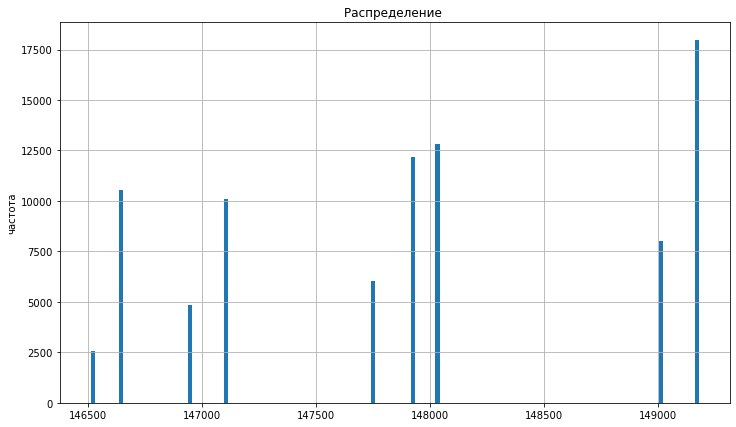

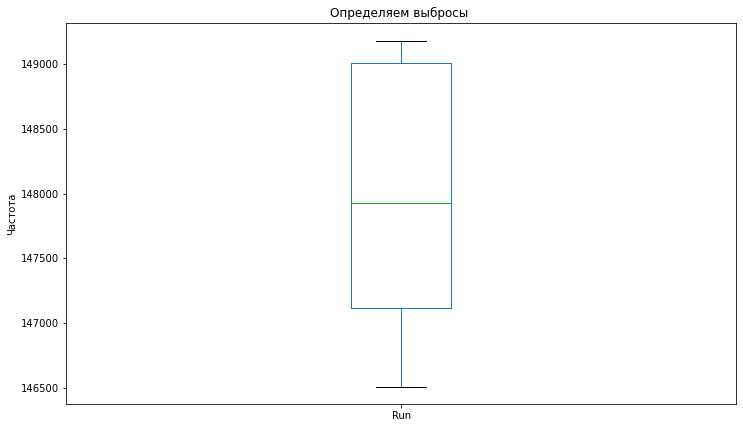

Распределение столбц:  Event
Содержание столбца :  [ 410503113  147290061   86810610 ...  252498172  140039199 1614382245]
______________________________________________________________________________________________


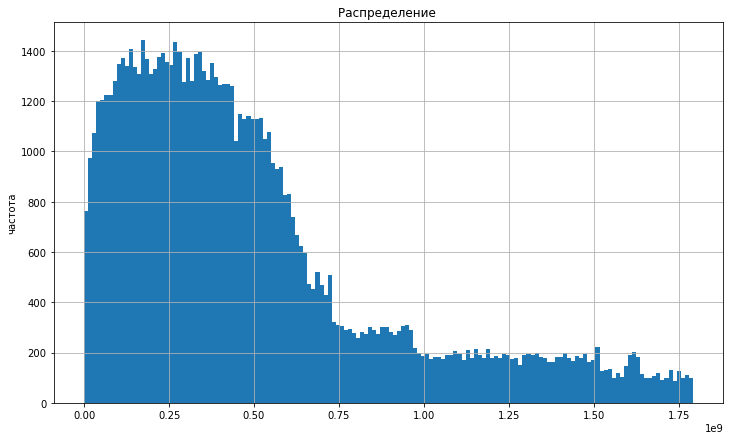

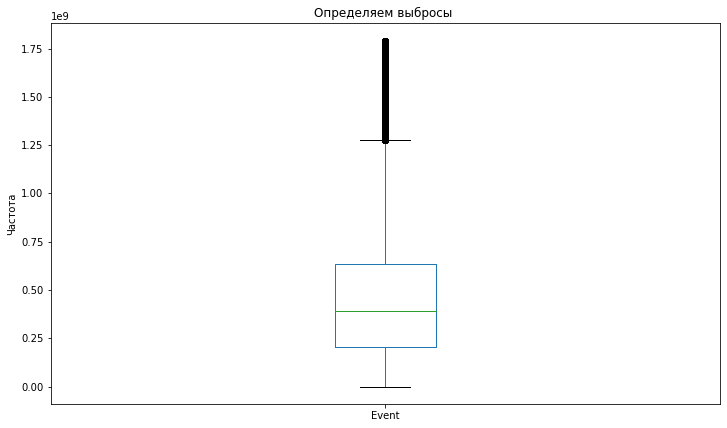

Распределение столбц:  E1
Содержание столбца :  [24.085   22.9463   2.39342 ...  2.71035  3.47801  7.38536]
______________________________________________________________________________________________


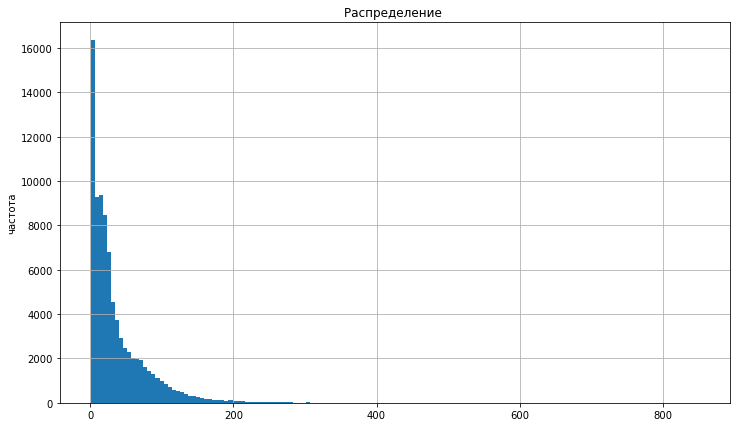

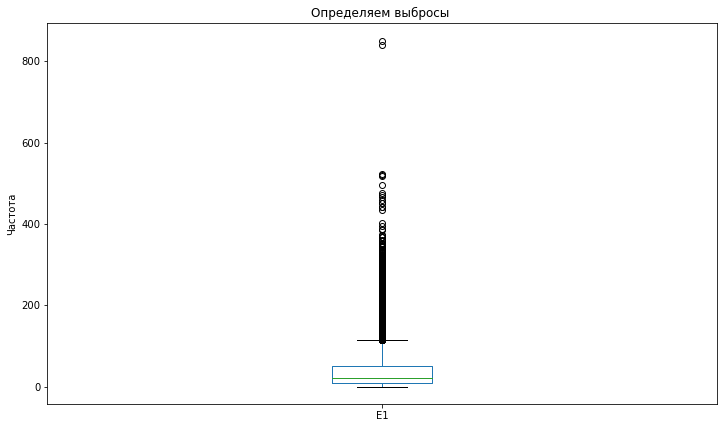

Распределение столбц:  px1
Содержание столбца :  [-4.59107  -4.67758   0.346488 ...  0.258549 -0.733209 -2.36361 ]
______________________________________________________________________________________________


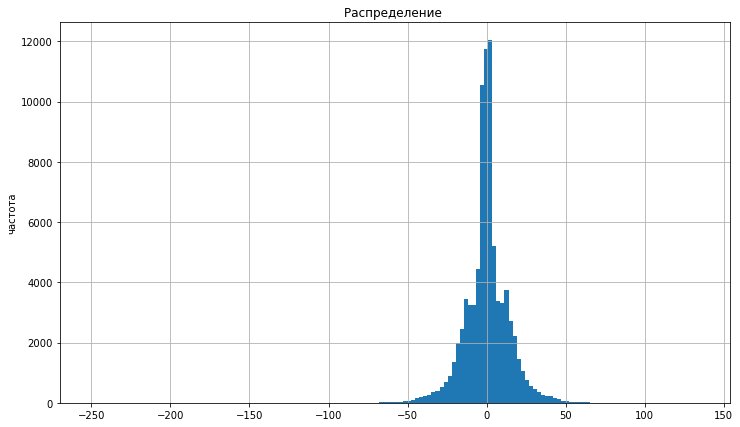

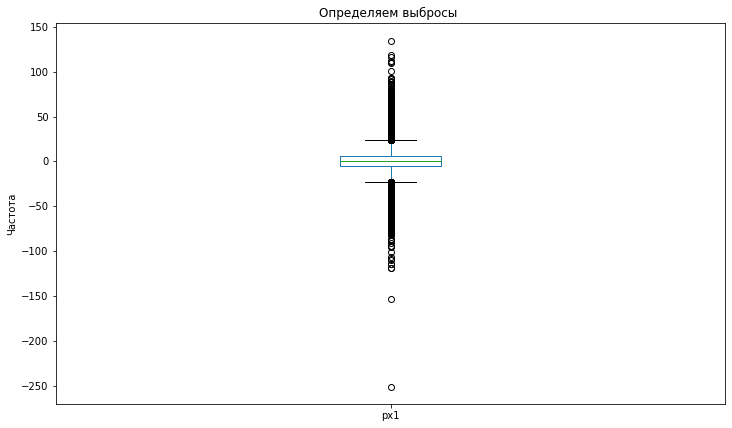

Распределение столбц:  py1
Содержание столбца :  [20.1106   5.18798 -1.93514 ...  1.79285  2.16623 -2.97007]
______________________________________________________________________________________________


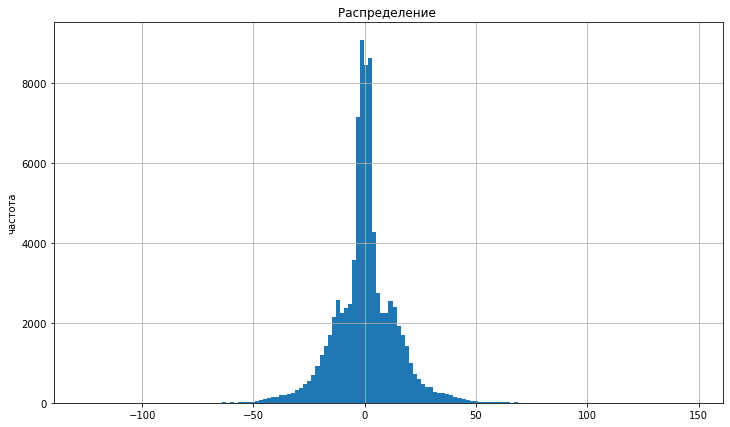

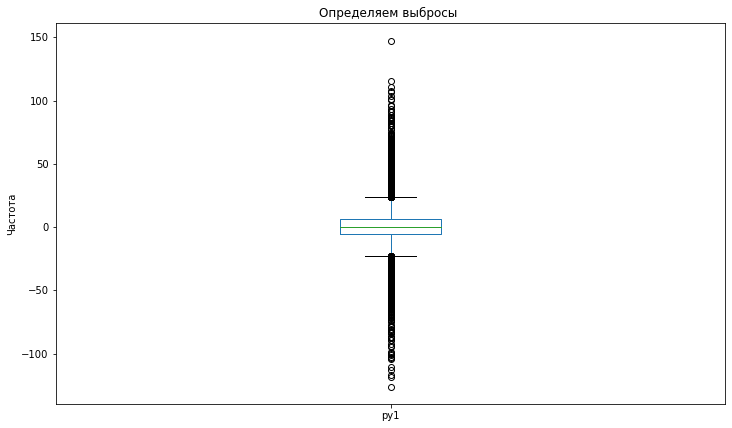

Распределение столбц:  pz1
Содержание столбца :  [ 12.4326  -21.8572    1.36514 ...   2.01614   2.62038   6.33526]
______________________________________________________________________________________________


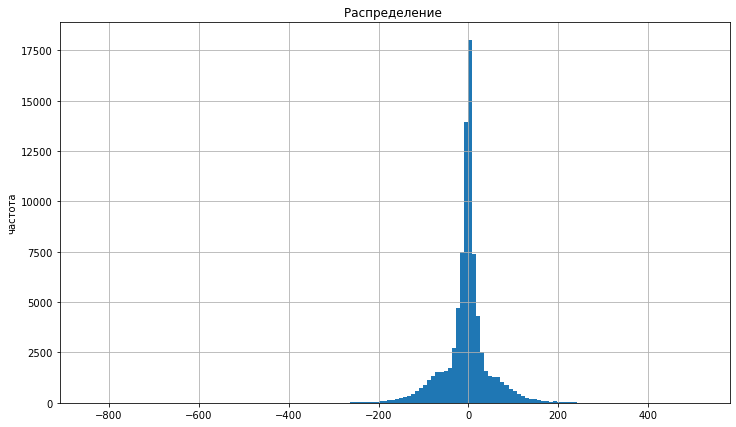

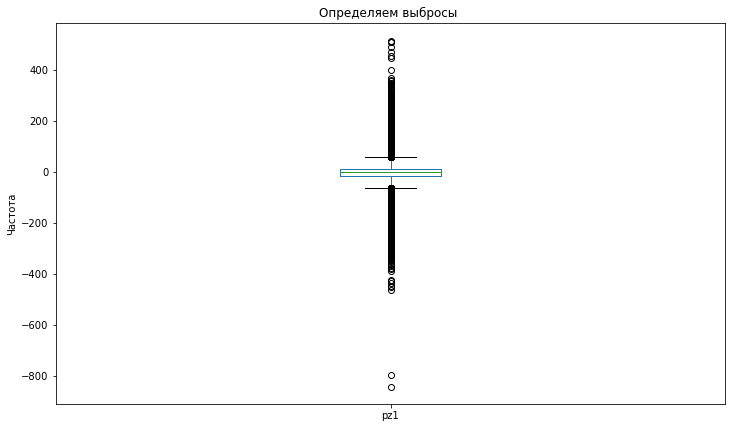

Распределение столбц:  pt1
Содержание столбца :  [20.628    6.98534  1.96592 ...  1.8114   2.28696  3.79579]
______________________________________________________________________________________________


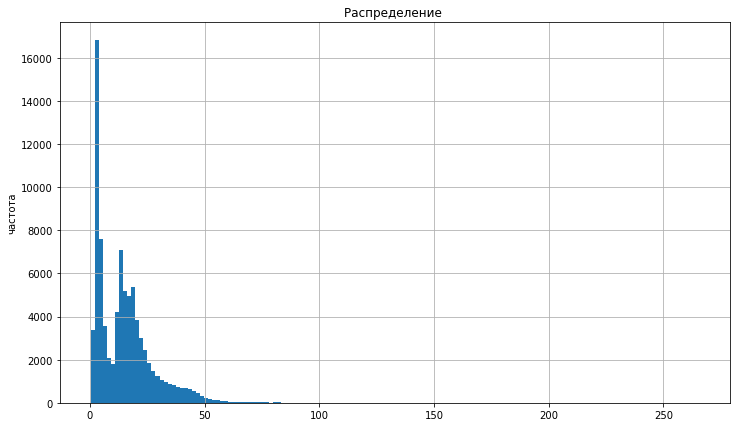

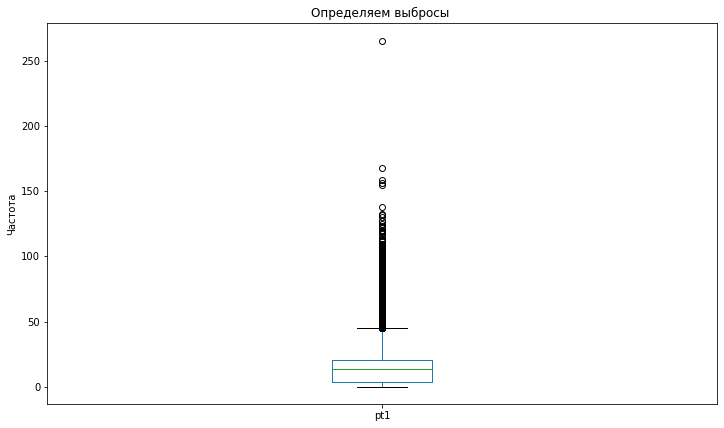

Распределение столбц:  eta1
Содержание столбца :  [ 0.571144 -1.85847   0.648077 ...  0.959084  0.980804  1.28501 ]
______________________________________________________________________________________________


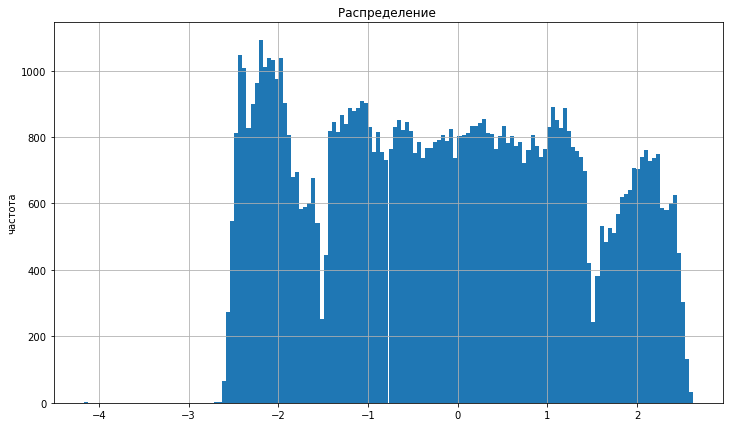

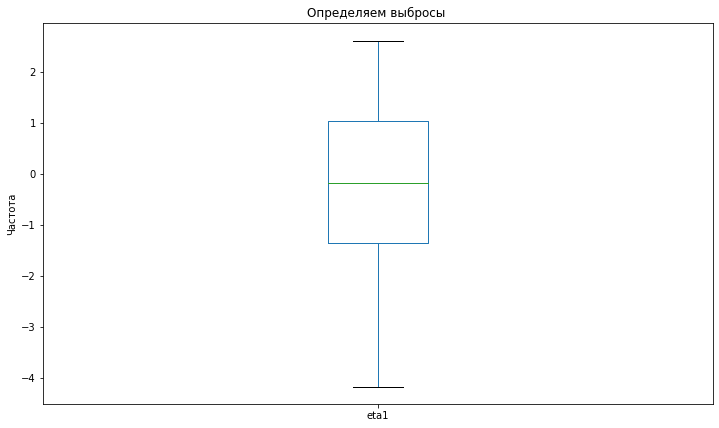

Распределение столбц:  phi1
Содержание столбца :  [ 1.79524  2.3045  -1.39362 ...  1.42757  1.89716 -2.24298]
______________________________________________________________________________________________


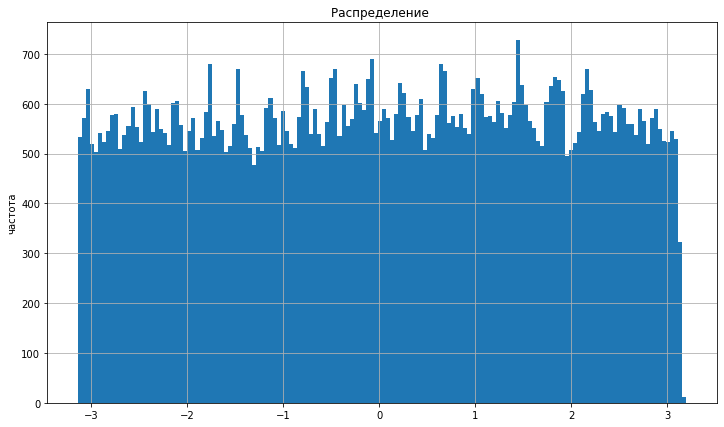

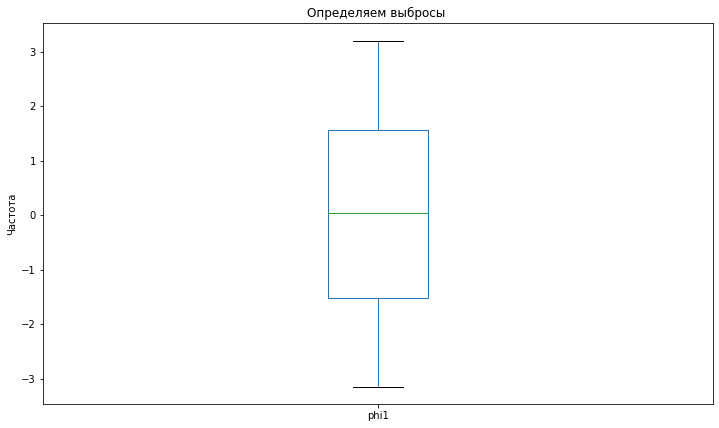

Распределение столбц:  Q1
Содержание столбца :  [-1  1  1 ... -1 -1 -1]
______________________________________________________________________________________________


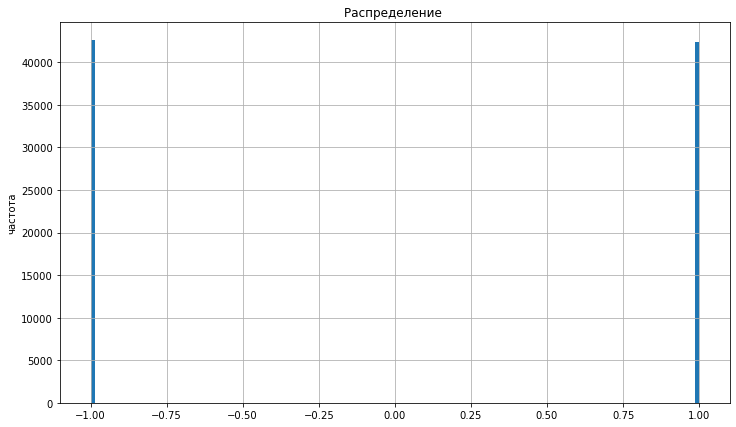

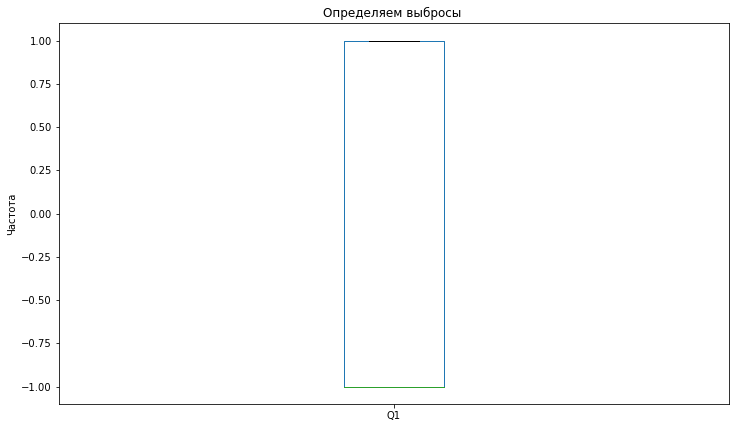

Распределение столбц:  E2
Содержание столбца :  [ 2.57188 67.1612  33.8619  ... 19.2859  16.7889  54.2619 ]
______________________________________________________________________________________________


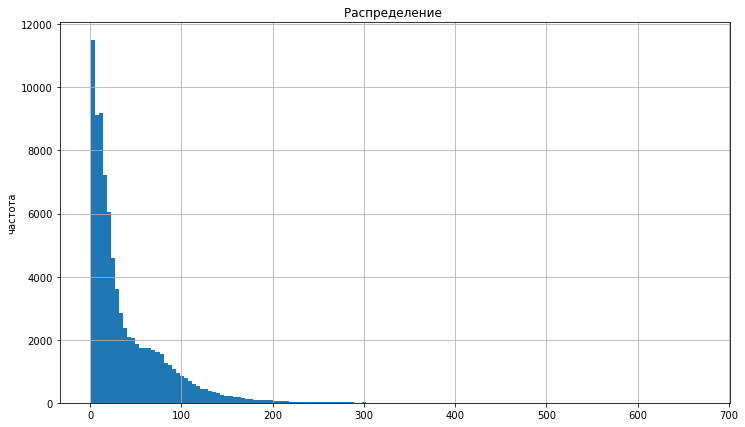

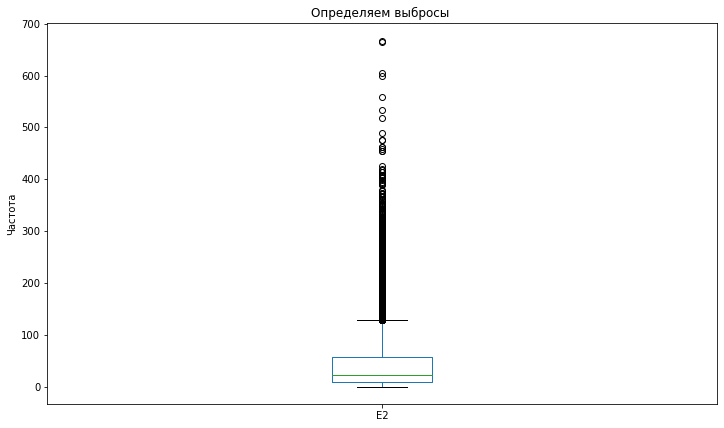

Распределение столбц:  px2
Содержание столбца :  [ -2.15672  -8.24769 -30.8737  ...   1.83493  -3.52827 -17.361  ]
______________________________________________________________________________________________


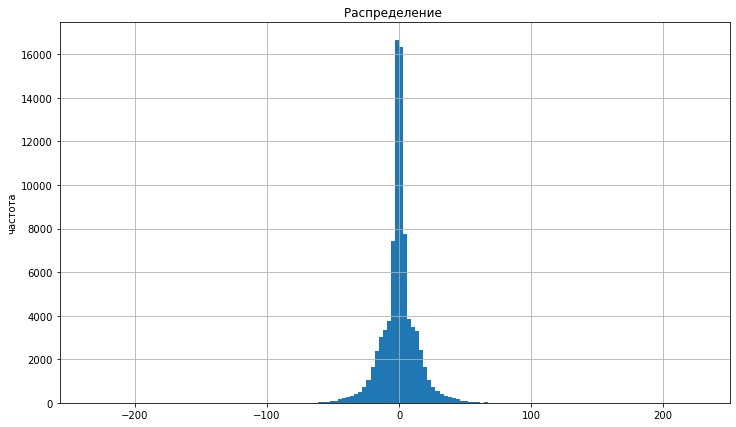

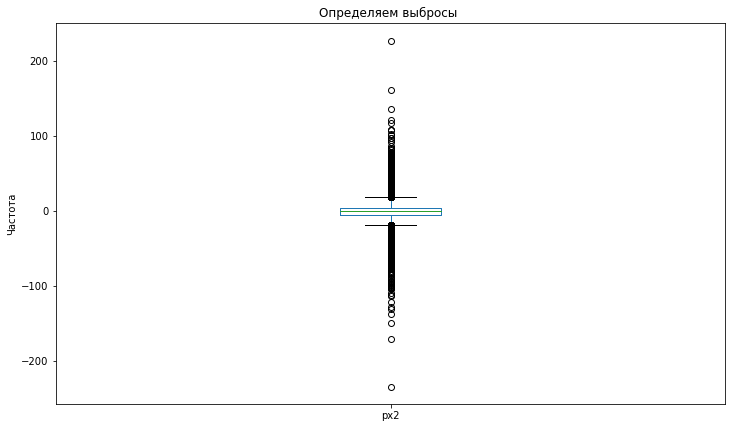

Распределение столбц:  py2
Содержание столбца :  [ -1.30836  11.3709   -8.12102 ...  12.7636   10.4579  -21.8159 ]
______________________________________________________________________________________________


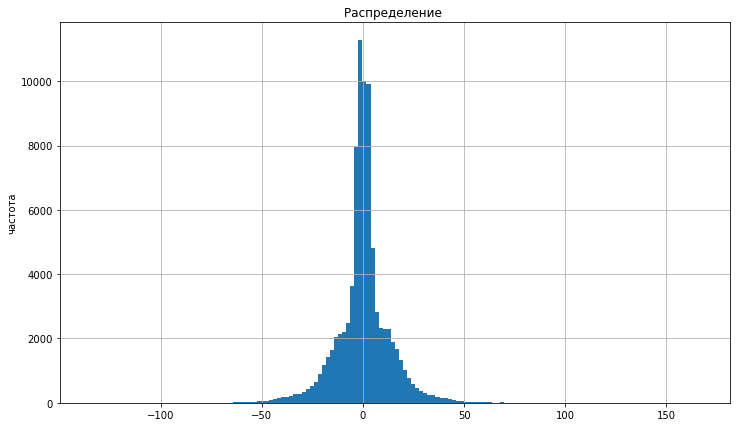

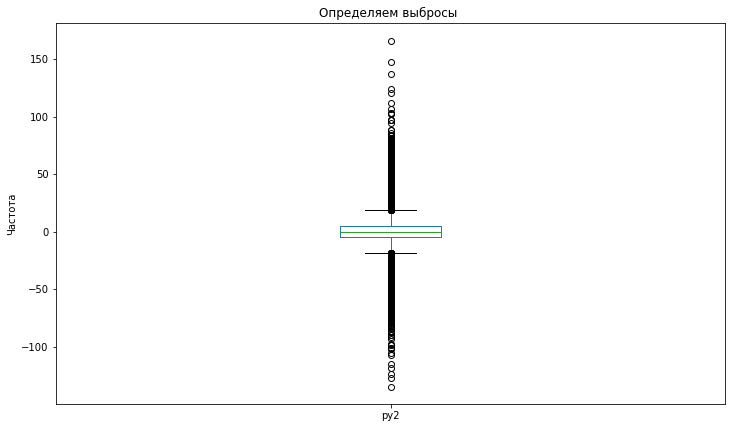

Распределение столбц:  pz2
Содержание столбца :  [  0.501343 -65.6758    11.2911   ...  14.3411    12.6511    46.5512  ]
______________________________________________________________________________________________


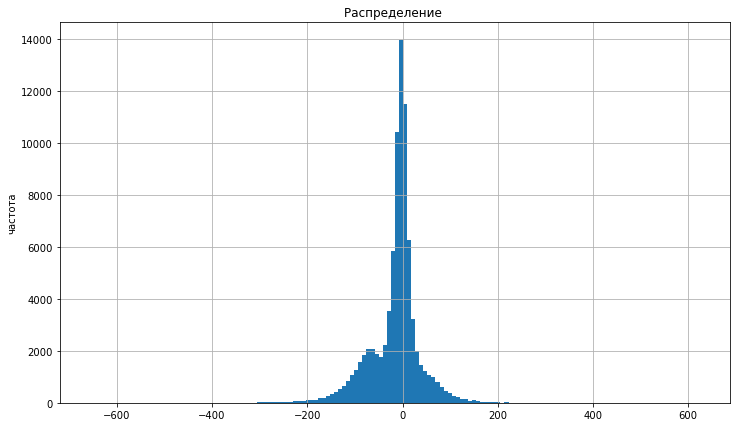

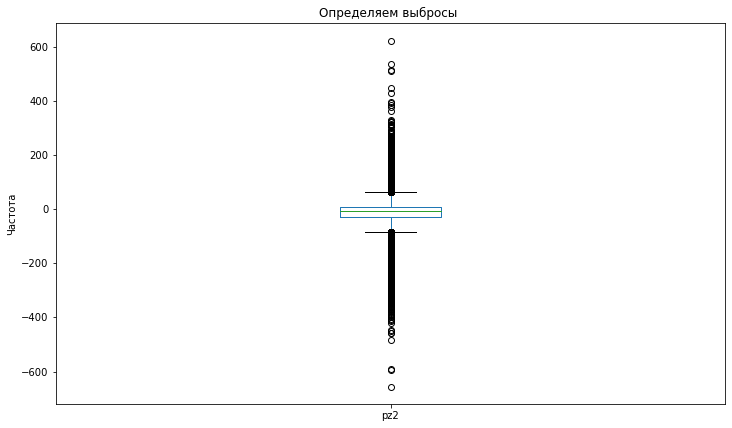

Распределение столбц:  pt2
Содержание столбца :  [ 2.52255 14.0471  31.9239  ... 12.8948  11.037   27.8808 ]
______________________________________________________________________________________________


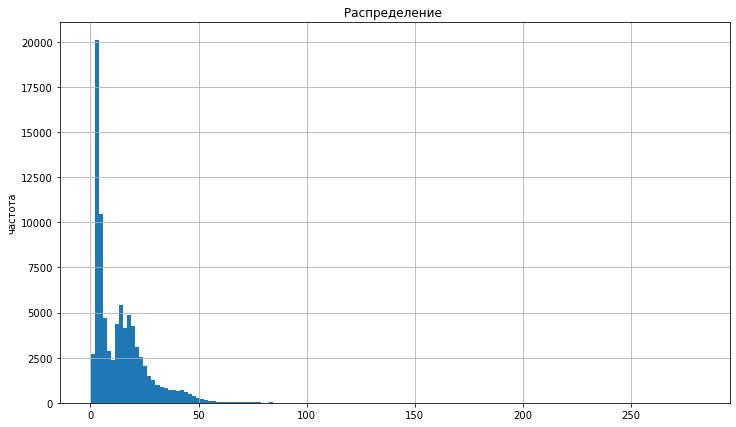

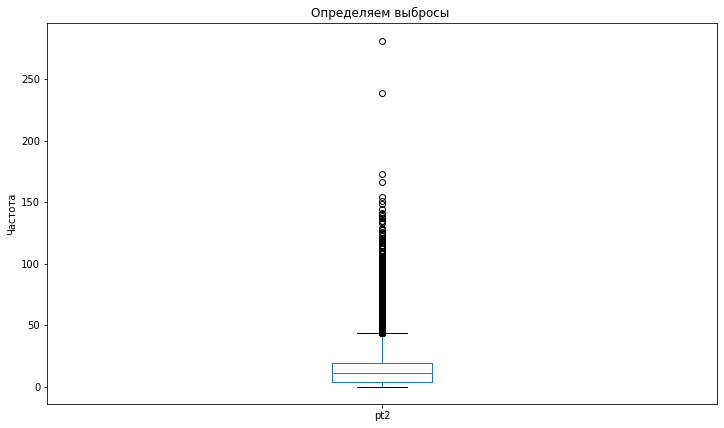

Распределение столбц:  eta2
Содержание столбца :  [ 0.197459 -2.24671   0.3467   ...  0.958503  0.981098  1.28533 ]
______________________________________________________________________________________________


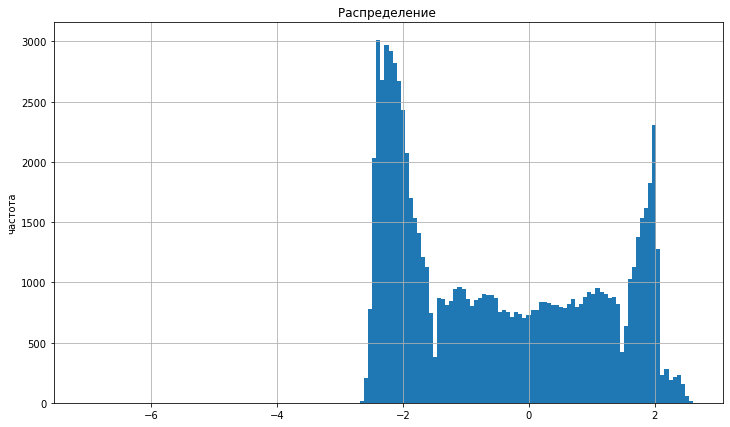

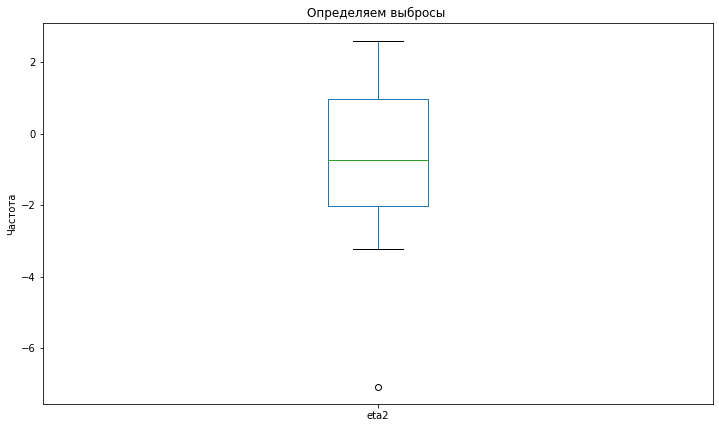

Распределение столбц:  phi2
Содержание столбца :  [-2.5963   2.19832 -2.88438 ...  1.42801  1.89618 -2.24297]
______________________________________________________________________________________________


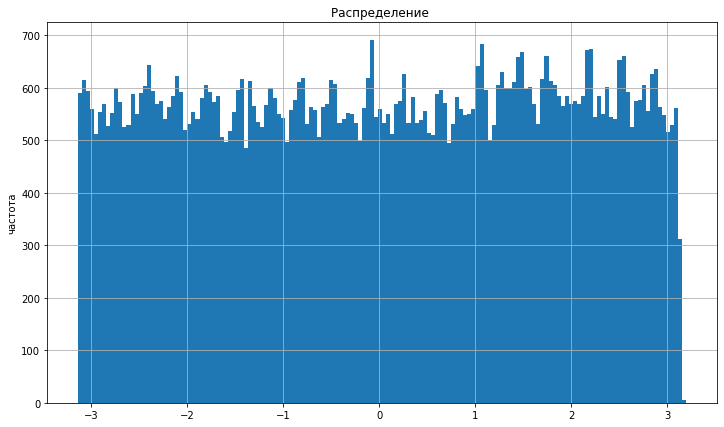

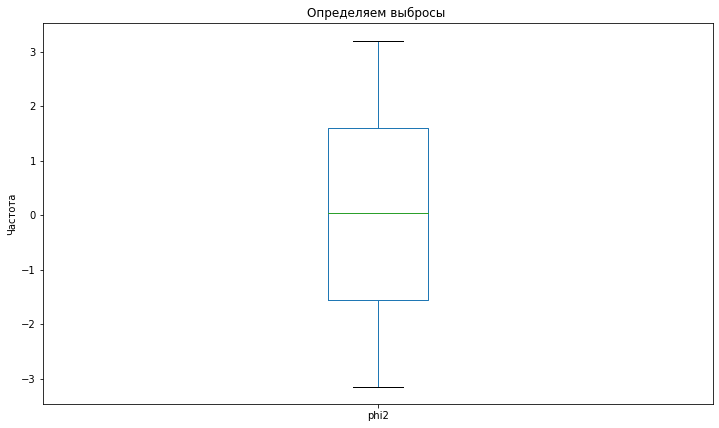

Распределение столбц:  M
Содержание столбца :  [12.0101  4.0102 11.0103 ... 99.9904 99.9904 99.9904]
______________________________________________________________________________________________


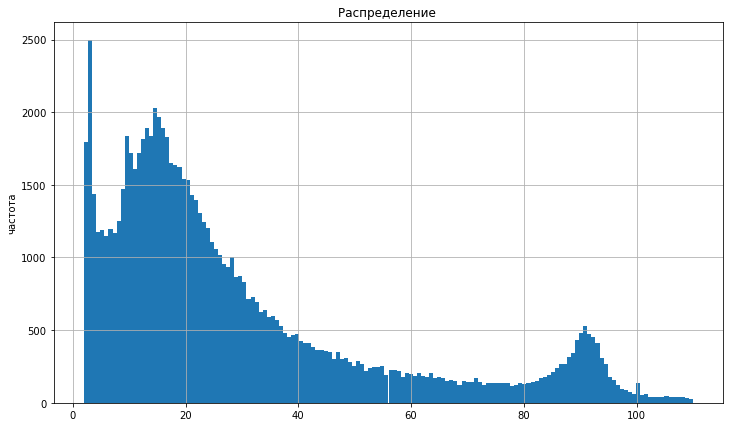

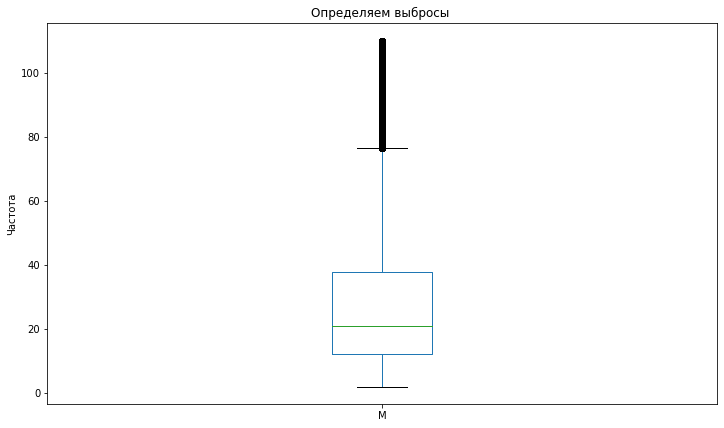

Распределение столбц:  Q2
Содержание столбца :  [1 1 1 ... 1 1 1]
______________________________________________________________________________________________


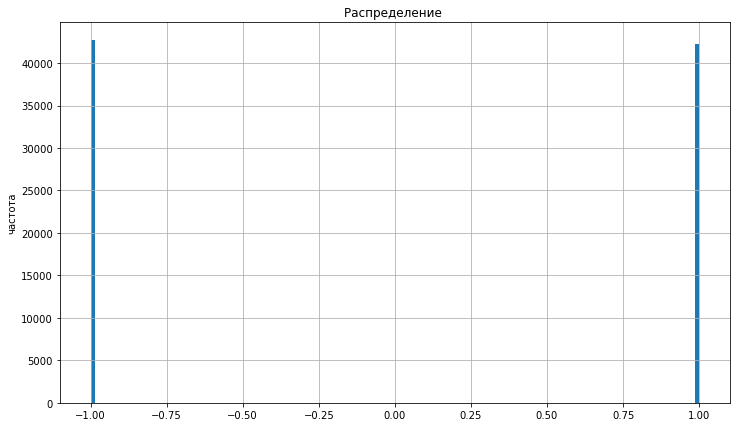

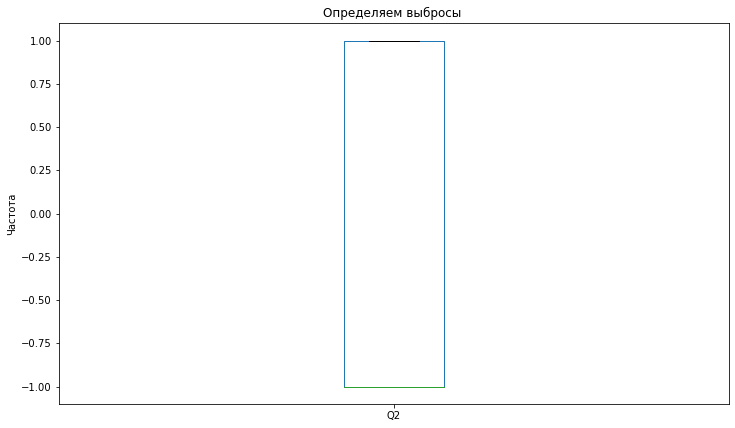

Корреляционная матрица признаков в датафрейме 


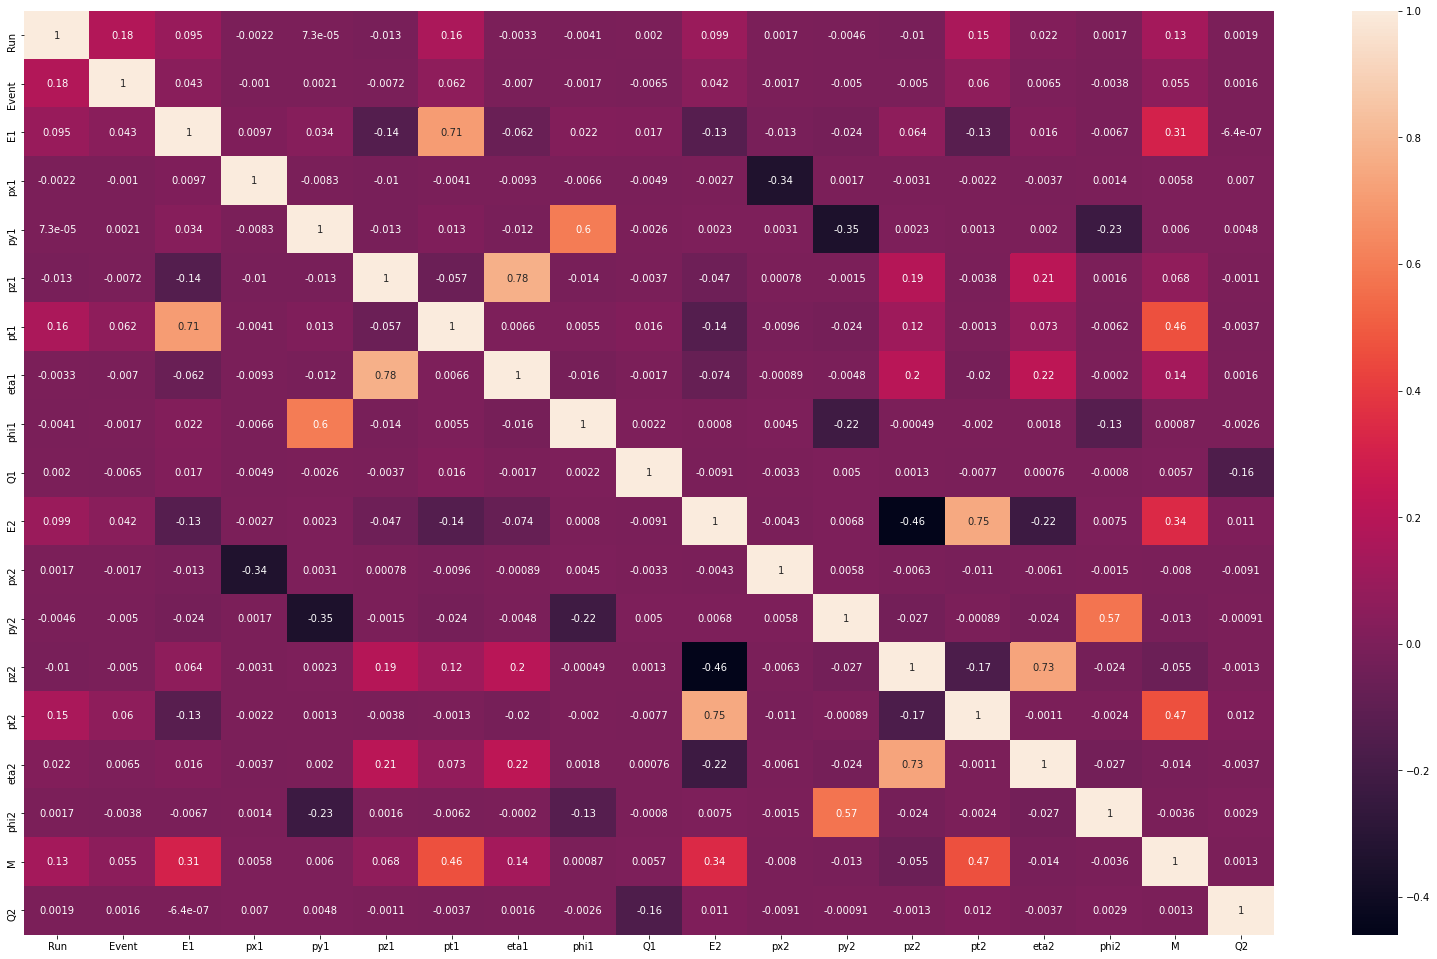

In [9]:
# проверка таблцы model или check на распределение, выбросы и корреляцию
df_2(df_model)
#df_2(df_check)

<a id='step2'></a>
[***&#10224;***](#step13) <a class="tocSkip">

### Разбиение на выборки

In [158]:
features = df_model.drop('Q2', axis=1) # Общие признаки
target = df_model['Q2'] # Целевой признак
 

In [159]:
# №1 Настройка train_test_split
random_state = 42
test_size = 0.05

# #№2 Произведем  нормализацию данных
# features = features.copy(deep=True)#создаем копию
# mean = features.mean(axis=0)
# features -= mean
# std = features.std(axis=0)
# features /= std

# №3 Произведем  Настройка метрики f1_score  формула -  F1 = 2 * (precision * recall) / (precision + recall
     # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html  ссылка на аннотацию

from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
average='macro'# 'micro', 'macro', 'weighted', None, zero_division=1 

In [160]:
X_train, X_test, y_train, y_test = train_test_split(features, target,random_state=random_state, test_size=test_size)

In [161]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80730, 18)
(4249, 18)
(80730,)
(4249,)


In [162]:
X_train.head(2)

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,M
8709,149011,158274811,52.70340,-12.148300,-0.819674,-51.2776,12.17590,-2.144750,-3.07422,-1,58.5837,22.70160,31.2052,44.0787,38.5892,0.978474,0.941856,106.29400
71211,149181,605821030,2.64717,-0.765709,1.848570,-1.7332,2.00088,-0.783548,1.96350,-1,43.4997,6.18597,11.5512,-41.4793,13.1033,-1.869540,1.079130,7.29969


Сохарняем результат в таком формате, чтобы его затем можно было бы вывести как CSV файл и выгружаем итоговый результат.

<a id='step3'></a>
[***&#10224;***](#step13) <a class="tocSkip">

### Обучение моделей

 <div style="border:solid green 2px; padding: 20px">
    

### Модели  :<a class="tocSkip">

-  __Логистическая регрессия__ -  [LogisticRegression](#step7)    
-  __Cлучайный лес__    - [RandomForestClassifier](#step8)
-  __LGBMRegressor__  - [LGBMClassifier](#step9)
-  __CatBoostRegressor__  - [CatBoostClassifier](#step10) 
-  __Полносвязная Нейросеть__  - [layers.Dense](#step11)    
   
</div>

In [163]:
# функция для построения графика важности признаков
def feature_importance_hist(model, features_train):
    importances = list(model.feature_importances_)
    names_indices = features_train.columns
    not_null_importances = []
    not_null_indices = []

    for i in importances:
        if i>=0:
            not_null_importances.append(i)
            not_null_indices.append(names_indices[importances.index(i)])
    
    plt.figure(figsize=(15, 11))
    plt.title("Feature importances")
 
    plt.bar(range(len(not_null_importances)), not_null_importances, color="g")
    plt.xticks(range(len(importances)), not_null_indices, rotation=90)
 
    plt.tight_layout()
    plt.xlim([-1, len(not_null_importances)])
    plt.show()

<a id='step7'></a>
__Логистическая регрессия - LogisticRegression()__<br>
[&#10224;](#step3)

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix



log_reg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
verbose=0, warm_start=False)
# log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', n_jobs=-1, solver='liblinear')

In [165]:
y_pred_train = log_reg.predict(X_train)
f_1_train1 = np.sqrt(f1_score(y_train, y_pred_train, average=average))
print(f_1_train1)
log_train = f1_score(y_train, y_pred_train, average=average)
print(log_train)

0.6402787482843679
0.40995687550459703


In [166]:
confusion_matrix = confusion_matrix(y_train,y_pred_train)
print(confusion_matrix)

[[36150  4367]
 [35872  4341]]


In [167]:
y_train.value_counts()

-1    40517
 1    40213
Name: Q2, dtype: int64

`Test`__Логистическа регрессия - LogisticRegression__<br>

In [168]:
y_pred_test = log_reg.predict(X_test)
f_1_test1 = np.sqrt(f1_score(y_test, y_pred_test, average=average))
print(f_1_test1)
log_test = f1_score(y_test, y_pred_test, average=average,zero_division=0)
print(log_test)

0.6355753017116325
0.40395596414583257


Применяем разработанную модель к нашим данным.

In [169]:
pred_log = log_reg.predict(df_check)

In [170]:
pred_log = pd.Series(pred_log)

In [171]:
pred_log.value_counts()

-1    13024
 1     1574
dtype: int64

In [172]:
pred_log.to_csv('Result_log.csv')
pred_log = pd.read_csv('C:/Users/Infoworker/YandexDisk-infomes@yandex.ru/1.3 Машинное обучение наука о данных/2 Академия Сбер/0 Хакатон/1 SCIENCEHack/Result_log.csv')
pred_log.head()

,Unnamed: 0,0
0,0,-1
1,1,-1
2,2,-1
3,3,-1
4,4,-1


In [173]:
pred_log.rename(columns={'0': 'Q2','Unnamed: 0':'Number'}, inplace=True)
pred_log

,Number,Q2
0,0,-1
1,1,-1
2,2,-1
3,3,-1
4,4,-1
...,...,...
14593,14593,-1
14594,14594,-1
14595,14595,-1
14596,14596,-1


In [174]:
df_check_log = df_check.join(pred_log)

In [175]:
df_check_log.head(2)

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,M,Number,Q2
0,148029,100003381,65.06780,5.37255,13.70060,63.381800,14.71640,2.166580,1.197080,-1,29.0169,4.54971,3.45453,28.449,5.71258,2.30852,0.649418,5.12717,0,-1
1,148031,100042391,3.12536,2.22344,2.00679,-0.892737,2.99514,-0.293816,0.734227,-1,116.8820,6.82027,-21.85020,114.619,22.88990,2.31389,-1.268240,31.50580,1,-1


In [176]:
pred_log = df_check_log.drop(['Run','E1','px1','py1','pz1','pt1','eta1','phi1','Q1','E2','px2','py2','pz2','pt2','eta2','phi2','M','Number'], axis='columns')

In [177]:
pred_log

,Event,Q2
0,100003381,-1
1,100042391,-1
2,100064781,-1
3,100065292,-1
4,1000680111,-1
...,...,...
14593,999130482,-1
14594,99928075,-1
14595,99947097,-1
14596,99949820,-1


In [178]:
pred_log.to_csv('Result_final_log.csv',index=False)

<a id='step8'></a>
__Cлучайный лес - RandomForestClassifier__<br>
[&#10224;](#step3)

In [179]:
%%time 
from sklearn.ensemble import RandomForestClassifier
# %%time посмотрим время  обучения
#my_cv = TimeSeriesSplit(n_splits=3).split(features_train) #  применим функцию TimeSeriesSplit()
#my_cv = StratifiedKFold(n_splits=3, shuffle = True, random_state=5)
my_cv = 5
# Объявим модель Случайного леса

forest = RandomForestClassifier()
# Определим словарь с набором параметров
forest_parametrs = { 'n_estimators': range(5, 15, 5),
                     'max_depth': range(1, 6, 2),
                     'min_samples_leaf': range(1,4),
                     'min_samples_split': range(2,6,2) }

# Применим  GridSearchCV с кросс-валидацией
#forest_model = GridSearchCV(forest, forest_parametrs, scoring=MSE_score, cv=my_cv )


# forest = RandomForestClassifier(random_state = 42, n_jobs = -1)

forest_model = RandomizedSearchCV(forest, forest_parametrs, scoring=f1_score, cv=my_cv)

forest_model.fit(X_train,y_train)

Wall time: 35.1 s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': range(1, 6, 2),
                                        'min_samples_leaf': range(1, 4),
                                        'min_samples_split': range(2, 6, 2),
                                        'n_estimators': range(5, 15, 5)},
                   scoring=<function f1_score at 0x00000214944D71F0>)

In [180]:
%%time

# Определяем оптимальные гиперпараметры и качество модели на кросс-валидации
forest_params = forest_model.best_params_
pred_for_train = forest_model.predict(X_train)
for_train1 = np.sqrt(f1_score(y_train, pred_for_train, average=average))
print(for_train1)
for_train = f1_score(y_train, pred_for_train, average=average)
print(for_train)


0.7614438807272186
0.5797967834969266
Wall time: 154 ms


`Test`__Cлучайный лес - RandomForestClassifier__<br>

In [181]:
%%time

#Обучим модель на оптимальных гиперпараметрах
forest_model = RandomForestClassifier(random_state=42,
                                     max_depth=forest_params['max_depth'],
                                     min_samples_leaf = forest_params['min_samples_leaf'],
                                     min_samples_split = forest_params['min_samples_split'],
                                     n_estimators = forest_params['n_estimators'])

forest_model.fit(X_train,y_train)


forest_model_predictions = forest_model.predict(X_test)
forest_test1 = np.sqrt(f1_score(y_test, forest_model_predictions, average=average))
print(forest_test1)
forest_test = f1_score(y_test, forest_model_predictions, average=average)
print(forest_test)

0.7582539406453759
0.5749490385042412
Wall time: 1.09 s


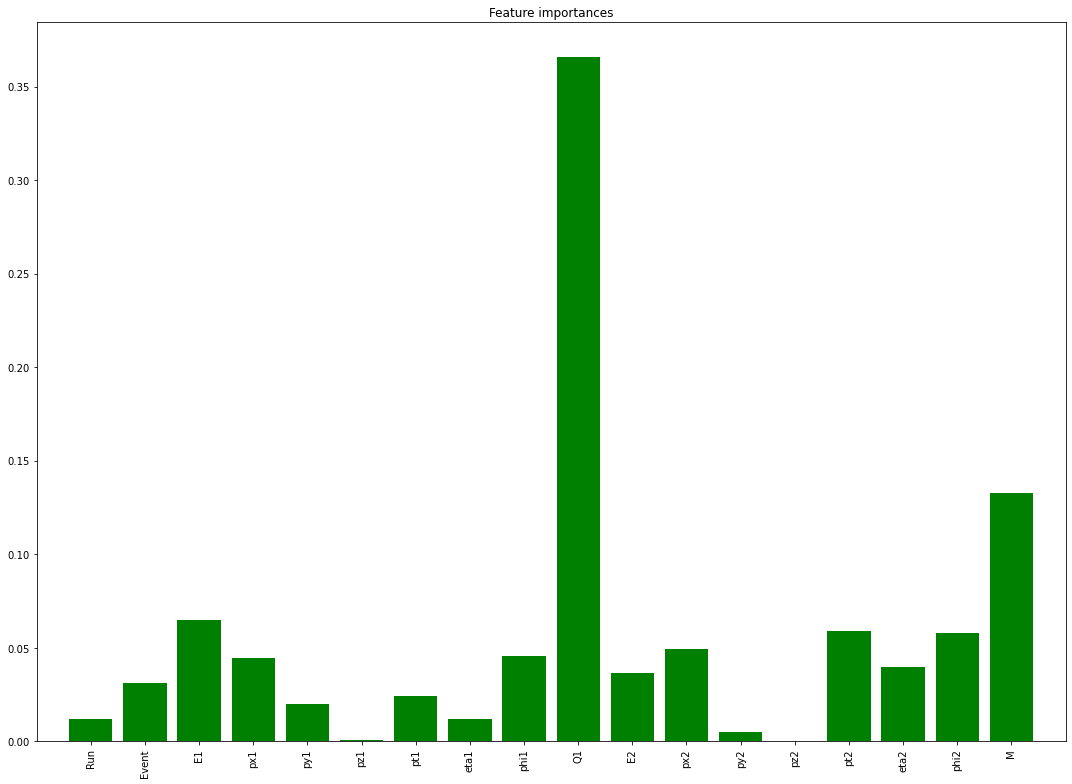

In [182]:
# график важности признаков модели forest_model
feature_importance_hist(forest_model, X_train)

Применяем разработанную модель к нашим данным.

In [183]:
pred_for = forest_model.predict(df_check)

In [184]:
pred_for = pd.Series(pred_for)

In [185]:
pred_for.value_counts()

 1    7485
-1    7113
dtype: int64

In [186]:
pred_for.to_csv('Result_for.csv')
pred_for = pd.read_csv('C:/Users/Infoworker/YandexDisk-infomes@yandex.ru/1.3 Машинное обучение наука о данных/2 Академия Сбер/0 Хакатон/1 SCIENCEHack/Result_for.csv')
pred_for.head(10)

,Unnamed: 0,0
0,0,1
1,1,1
2,2,1
3,3,-1
4,4,-1
5,5,-1
6,6,1
7,7,1
8,8,1
9,9,1


In [187]:
pred_for.rename(columns={'0': 'Q2','Unnamed: 0':'Number'}, inplace=True)
pred_for

,Number,Q2
0,0,1
1,1,1
2,2,1
3,3,-1
4,4,-1
...,...,...
14593,14593,1
14594,14594,1
14595,14595,1
14596,14596,-1


In [188]:
df_check_for = df_check.join(pred_for)

In [189]:
df_check_for.head(2)

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,M,Number,Q2
0,148029,100003381,65.06780,5.37255,13.70060,63.381800,14.71640,2.166580,1.197080,-1,29.0169,4.54971,3.45453,28.449,5.71258,2.30852,0.649418,5.12717,0,1
1,148031,100042391,3.12536,2.22344,2.00679,-0.892737,2.99514,-0.293816,0.734227,-1,116.8820,6.82027,-21.85020,114.619,22.88990,2.31389,-1.268240,31.50580,1,1


In [190]:
pred_for = df_check_for.drop(['Run','E1','px1','py1','pz1','pt1','eta1','phi1','Q1','E2','px2','py2','pz2','pt2','eta2','phi2','M','Number'], axis='columns')

In [191]:
pred_for

,Event,Q2
0,100003381,1
1,100042391,1
2,100064781,1
3,100065292,-1
4,1000680111,-1
...,...,...
14593,999130482,1
14594,99928075,1
14595,99947097,1
14596,99949820,-1


In [192]:
pred_for.to_csv('Result_final_for.csv',index=False)

<a id='step9'></a>
__LGBMClassifier__<br>
[&#10224;](#step3)

In [193]:
%%time 
#my_cv = TimeSeriesSplit(n_splits=3).split(features_train) #  применим функцию TimeSeriesSplit()
#my_cv = StratifiedKFold(n_splits=3, shuffle = True, random_state=5)
my_cv =5
# Объявим модель LGBMRegressor
lg = lgb.LGBMClassifier()
# Создаем словарь с набором параметров
lg_parametrs = {"max_depth": [25, 50, 75],
               "learning_rate" : [0.01, 0.1],
               "num_leaves": [200, 500, 1200],
               "n_estimators": range (5, 15, 5)}
# ({"objective": "binary", "verbosity": -1},
#        train_set=test_dataset, num_boost_round=10,
#        nfold=5, stratified=True, shuffle=True,
#        verbose_eval=True)
# Применим  GridSearchCV с кросс-валидацией
#lg_model = GridSearchCV(lg, lg_parametrs, scoring=MSE_score, cv=my_cv )
lg_model = RandomizedSearchCV(lg, lg_parametrs, scoring=f1_score, cv=my_cv )
lg_model.fit(X_train,y_train)

Wall time: 35.5 s


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.1],
                                        'max_depth': [25, 50, 75],
                                        'n_estimators': range(5, 15, 5),
                                        'num_leaves': [200, 500, 1200]},
                   scoring=<function f1_score at 0x00000214944D71F0>)

In [194]:
%%time 
# Определяем оптимальные гиперпараметры и качество модели на кросс-валидации
lg_params = lg_model.best_params_
lg_model_pred_train = lg_model.predict(X_train)

lg_model_train1 = np.sqrt(f1_score(y_train, lg_model_pred_train, average=average))
print(lg_model_train1)

lg_model_train = f1_score(y_train, lg_model_pred_train, average=average)
print(lg_model_train)



0.7616429626039461
0.5801000024841162
Wall time: 209 ms


`Test`__LGBMRClassifier__<br>

In [195]:
%%time
#Обучим модель на оптимальных гиперпараметрах
lg_model = lgb.LGBMClassifier(max_depth= lg_params['max_depth'],
                             learning_rate = lg_params['learning_rate'],
                             num_leaves = lg_params['num_leaves'],
                             n_estimators = lg_params['n_estimators'])

lg_model.fit(X_train,y_train)

lg_model_pred_test = lg_model.predict(X_test)

lg_model_test1 = np.sqrt(f1_score(y_test, lg_model_pred_test, average=average))
print(lg_model_test1)

lg_model_test = f1_score(y_test, lg_model_pred_test, average=average)
print(lg_model_test)



0.7375971641149927
0.5440495765104794
Wall time: 475 ms


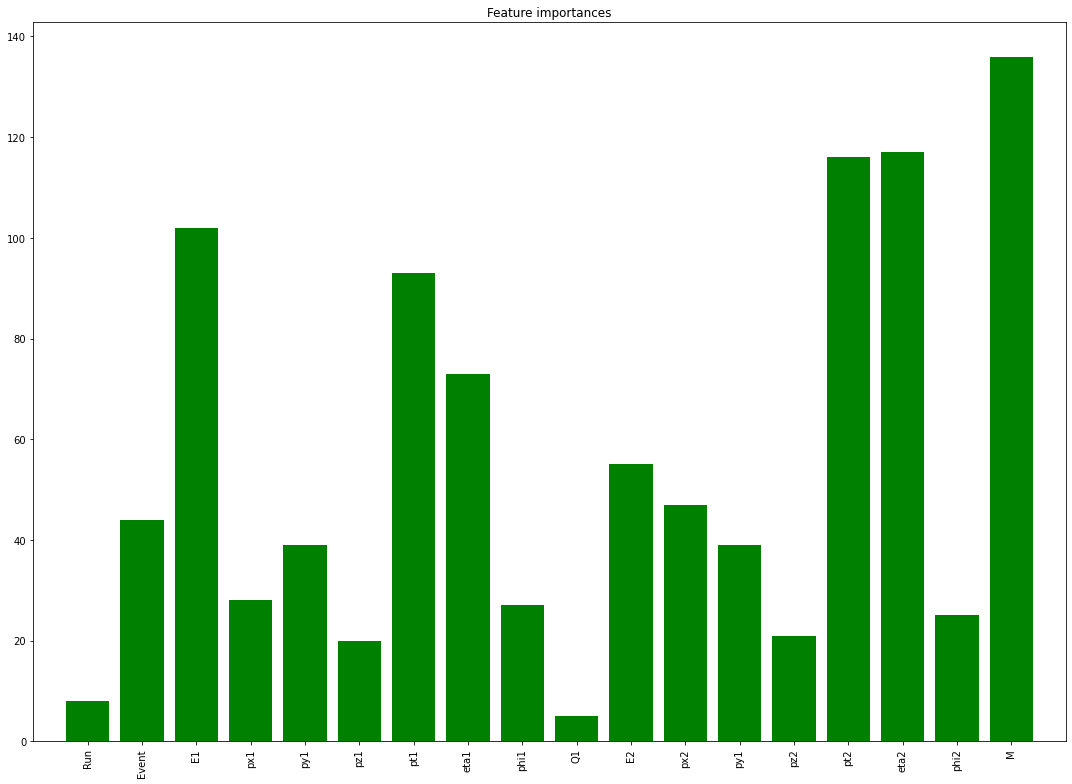

In [196]:
# график важности признаков модели lg_model
feature_importance_hist(lg_model, X_train)

Применяем разработанную модель к нашим данным.

In [197]:
pred_lg = lg_model.predict(df_check)

In [198]:
pred_lg = pd.Series(pred_lg)

In [199]:
pred_lg.value_counts()

-1    11059
 1     3539
dtype: int64

In [200]:
pred_lg.to_csv('Result_lg.csv')
pred_lg = pd.read_csv('C:/Users/Infoworker/YandexDisk-infomes@yandex.ru/1.3 Машинное обучение наука о данных/2 Академия Сбер/0 Хакатон/1 SCIENCEHack/Result_lg.csv')
pred_lg.head(3)

,Unnamed: 0,0
0,0,1
1,1,-1
2,2,1


In [201]:
pred_lg.rename(columns={'0': 'Q2','Unnamed: 0':'Number'}, inplace=True)
pred_lg.head()

,Number,Q2
0,0,1
1,1,-1
2,2,1
3,3,-1
4,4,1


In [202]:
df_check_lg = df_check.join(pred_lg)

In [203]:
df_check_lg.head(2)

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,M,Number,Q2
0,148029,100003381,65.06780,5.37255,13.70060,63.381800,14.71640,2.166580,1.197080,-1,29.0169,4.54971,3.45453,28.449,5.71258,2.30852,0.649418,5.12717,0,1
1,148031,100042391,3.12536,2.22344,2.00679,-0.892737,2.99514,-0.293816,0.734227,-1,116.8820,6.82027,-21.85020,114.619,22.88990,2.31389,-1.268240,31.50580,1,-1


In [204]:
pred_lg = df_check_lg.drop(['Run','E1','px1','py1','pz1','pt1','eta1','phi1','Q1','E2','px2','py2','pz2','pt2','eta2','phi2','M','Number'], axis='columns')

In [205]:
pred_lg

,Event,Q2
0,100003381,1
1,100042391,-1
2,100064781,1
3,100065292,-1
4,1000680111,1
...,...,...
14593,999130482,-1
14594,99928075,1
14595,99947097,-1
14596,99949820,-1


In [206]:
pred_lg.to_csv('Result_final_lg.csv',index=False)

<a id='step10'></a>
__CatBoostClassifier__<br>
[&#10224;](#step3)

In [207]:
%%time
import catboost as cb # Импорт CatBoost
#my_cv = TimeSeriesSplit(n_splits=3).split(features_train)
my_cv = StratifiedKFold(n_splits=3, shuffle = True, random_state=5)
#my_cv =5
# Объявим модель CatBoostRegressor
cb = cb.CatBoostClassifier()
# Словарь с набором параметров
cb_parametrs = {"iterations": [17],
                "depth": range(4, 16, 2),
                "learning_rate" : [0.15]}

#Применяем GridSearchCV с кросс-валидацией
#cb_model = GridSearchCV(cb, cb_parametrs, scoring=MSE_score, cv=my_cv)
cb_model = RandomizedSearchCV(cb, cb_parametrs, scoring=f1_score, cv=my_cv)
cb_model.fit(X_train,y_train)

0:	learn: 0.6845885	total: 14.7ms	remaining: 236ms
1:	learn: 0.6783545	total: 29.2ms	remaining: 219ms
2:	learn: 0.6730920	total: 42ms	remaining: 196ms
3:	learn: 0.6693862	total: 55.2ms	remaining: 179ms
4:	learn: 0.6658716	total: 69.6ms	remaining: 167ms
5:	learn: 0.6627731	total: 82.9ms	remaining: 152ms
6:	learn: 0.6602258	total: 96.4ms	remaining: 138ms
7:	learn: 0.6581988	total: 110ms	remaining: 123ms
8:	learn: 0.6562979	total: 123ms	remaining: 109ms
9:	learn: 0.6552389	total: 136ms	remaining: 95.3ms
10:	learn: 0.6538724	total: 150ms	remaining: 81.7ms
11:	learn: 0.6534335	total: 163ms	remaining: 67.9ms
12:	learn: 0.6521754	total: 176ms	remaining: 54.2ms
13:	learn: 0.6513663	total: 192ms	remaining: 41.2ms
14:	learn: 0.6508454	total: 208ms	remaining: 27.7ms
15:	learn: 0.6506354	total: 222ms	remaining: 13.9ms
16:	learn: 0.6500021	total: 236ms	remaining: 0us
0:	learn: 0.6842930	total: 13.4ms	remaining: 214ms
1:	learn: 0.6779175	total: 26.6ms	remaining: 199ms
2:	learn: 0.6728444	total: 40.5

10:	learn: 0.6417591	total: 1.41s	remaining: 771ms
11:	learn: 0.6397304	total: 1.53s	remaining: 639ms
12:	learn: 0.6382355	total: 1.66s	remaining: 512ms
13:	learn: 0.6365960	total: 1.81s	remaining: 387ms
14:	learn: 0.6349177	total: 1.94s	remaining: 258ms
15:	learn: 0.6336660	total: 2.06s	remaining: 129ms
16:	learn: 0.6326753	total: 2.23s	remaining: 0us
0:	learn: 0.6828793	total: 174ms	remaining: 2.78s
1:	learn: 0.6741651	total: 319ms	remaining: 2.39s
2:	learn: 0.6677053	total: 481ms	remaining: 2.24s
3:	learn: 0.6628192	total: 611ms	remaining: 1.99s
4:	learn: 0.6586276	total: 745ms	remaining: 1.79s
5:	learn: 0.6548629	total: 873ms	remaining: 1.6s
6:	learn: 0.6520448	total: 1s	remaining: 1.44s
7:	learn: 0.6497430	total: 1.12s	remaining: 1.26s
8:	learn: 0.6470973	total: 1.25s	remaining: 1.11s
9:	learn: 0.6449238	total: 1.38s	remaining: 968ms
10:	learn: 0.6430582	total: 1.51s	remaining: 824ms
11:	learn: 0.6409871	total: 1.64s	remaining: 685ms
12:	learn: 0.6394565	total: 1.81s	remaining: 55

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=5, shuffle=True),
                   estimator=<catboost.core.CatBoostClassifier object at 0x00000214A0E09B80>,
                   param_distributions={'depth': range(4, 16, 2),
                                        'iterations': [17],
                                        'learning_rate': [0.15]},
                   scoring=<function f1_score at 0x00000214944D71F0>)

In [208]:
%%time 
# Определяем оптимальные гиперпараметры и качество модели на кросс-валидации

cb_model_pred_train = cb_model.predict(X_train)

cb_model_train1 = np.sqrt(f1_score(y_train, cb_model_pred_train, average=average))
print(cb_model_train1)

cb_model_train = f1_score(y_train, cb_model_pred_train, average=average)
print(cb_model_train)


cb_params = cb_model.best_params_

#cb_score2 = cb_model.score(features_train, target_train) * (-1)
cb_score = round((cb_model.best_score_)* (-1), 3)


0.761631899981755
0.580083151069818
Wall time: 145 ms


`Test`__CatBoostClassifier__<br>

In [209]:
%%time
import catboost as cb # Импорт CatBoost
#Обучим модель на оптимальных гиперпараметрах
cb_model = cb.CatBoostClassifier(learning_rate=cb_params['learning_rate'],depth=cb_params['depth'])

cb_model.fit(X_train,y_train, verbose=10)


cb_model_pred_test = cb_model.predict(X_test)

cb_model_test1 = np.sqrt(f1_score(y_test, cb_model_pred_test, average=average))
print(cb_model_test1)

cb_model_test = f1_score(y_test, cb_model_pred_test, average=average)
print(cb_model_test)



0:	learn: 0.6794571	total: 30.9ms	remaining: 30.9s
10:	learn: 0.6504587	total: 353ms	remaining: 31.7s
20:	learn: 0.6467400	total: 707ms	remaining: 33s
30:	learn: 0.6450215	total: 1.09s	remaining: 34.3s
40:	learn: 0.6443785	total: 1.49s	remaining: 34.8s
50:	learn: 0.6437230	total: 1.93s	remaining: 35.9s
60:	learn: 0.6432419	total: 2.3s	remaining: 35.4s
70:	learn: 0.6426381	total: 2.77s	remaining: 36.2s
80:	learn: 0.6419883	total: 3.19s	remaining: 36.1s
90:	learn: 0.6407438	total: 3.57s	remaining: 35.7s
100:	learn: 0.6400338	total: 3.97s	remaining: 35.4s
110:	learn: 0.6393478	total: 4.34s	remaining: 34.8s
120:	learn: 0.6386487	total: 4.72s	remaining: 34.3s
130:	learn: 0.6379780	total: 5.14s	remaining: 34.1s
140:	learn: 0.6372392	total: 5.62s	remaining: 34.3s
150:	learn: 0.6364091	total: 6.01s	remaining: 33.8s
160:	learn: 0.6356543	total: 6.36s	remaining: 33.2s
170:	learn: 0.6350971	total: 6.73s	remaining: 32.6s
180:	learn: 0.6344761	total: 7.1s	remaining: 32.1s
190:	learn: 0.6338644	tota

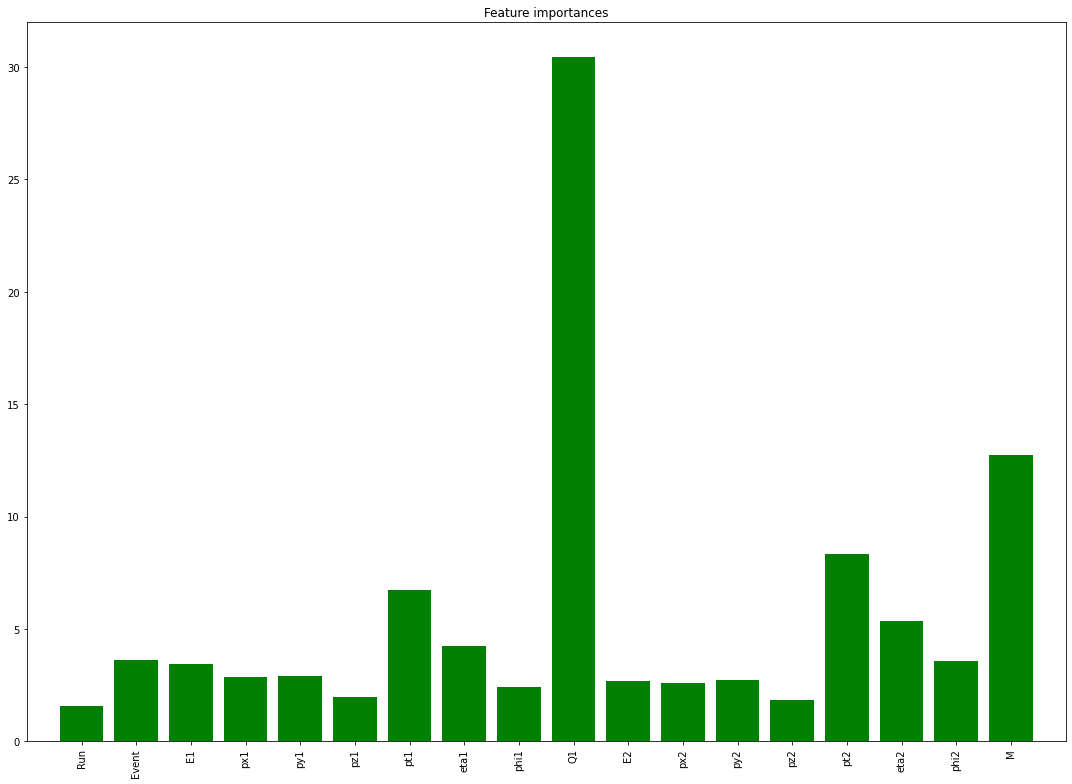

In [210]:
# график важности признаков модели cb_model
feature_importance_hist(cb_model, X_train)

In [211]:
pred_cb = cb_model.predict(df_check)

In [212]:
pred_cb = pd.Series(pred_cb)

In [213]:
pred_cb.value_counts()

-1    7746
 1    6852
dtype: int64

In [214]:
pred_cb.to_csv('Result_cb.csv')
pred_cb = pd.read_csv('C:/Users/Infoworker/YandexDisk-infomes@yandex.ru/1.3 Машинное обучение наука о данных/2 Академия Сбер/0 Хакатон/1 SCIENCEHack/Result_cb.csv')
pred_cb.head(3)

,Unnamed: 0,0
0,0,-1
1,1,-1
2,2,1


In [215]:
pred_cb.rename(columns={'0': 'Q2','Unnamed: 0':'Number'}, inplace=True)
pred_cb.head()

,Number,Q2
0,0,-1
1,1,-1
2,2,1
3,3,-1
4,4,-1


In [216]:
df_check_cb = df_check.join(pred_cb)

In [217]:
df_check_cb.head(2)

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,M,Number,Q2
0,148029,100003381,65.06780,5.37255,13.70060,63.381800,14.71640,2.166580,1.197080,-1,29.0169,4.54971,3.45453,28.449,5.71258,2.30852,0.649418,5.12717,0,-1
1,148031,100042391,3.12536,2.22344,2.00679,-0.892737,2.99514,-0.293816,0.734227,-1,116.8820,6.82027,-21.85020,114.619,22.88990,2.31389,-1.268240,31.50580,1,-1


In [218]:
pred_cb = df_check_cb.drop(['Run','E1','px1','py1','pz1','pt1','eta1','phi1','Q1','E2','px2','py2','pz2','pt2','eta2','phi2','M','Number'], axis='columns')

In [219]:
pred_cb

,Event,Q2
0,100003381,-1
1,100042391,-1
2,100064781,1
3,100065292,-1
4,1000680111,-1
...,...,...
14593,999130482,-1
14594,99928075,1
14595,99947097,-1
14596,99949820,-1


In [220]:
pred_cb.to_csv('Result_final_cb.csv',index=False)

<a id='step11'></a>
__Полносвязная Нейросеть__<br>
[&#10224;](#step3)

В функции build_model() соберем полносвязную нейронную сеть, выберем оптимизатор и метрики потерь и качества.

Перед обучением разобъем нашу таблицу на K-кратные перекрестные проверки, 

Оценка проверки для используемой модели является средним значением полученных K баллов проверки.

<a id='step4'></a>
[***&#10224;***](#step13) <a class="tocSkip">

### Таблица  результатов

In [221]:
columns = ['Алгоритм','f1_train', 'f1_test' ]

log = ['Логистическая регрессия ', round(log_train,4), round(log_test,4)]

forest = ['Случайный лес',round(for_train,4), round(forest_test,4)]

LGBMClassifier = ['LGBMClassifier',round(lg_model_train,4),round(lg_model_test,4)]

CatBoostClassifier = ['CatBoostClassifier', round(cb_model_train,4),round(cb_model_test,4)]

#Нейросеть = ['Нейросеть',np.median(mae), np.median(all_scores) ]


table_result_test = pd.DataFrame([log,forest,LGBMClassifier,CatBoostClassifier,], columns = columns) # Нейросеть


print('(1) propuski mean, (2) без нормализация, ' ,'\n' ,\
      '(3) average="micro"(4) random_state = 42','\n' , '(5) test_size = 0.17, (6) удалил дубликаты','\n' ,'удалены выбросы')
table_result_test

(1) propuski mean, (2) без нормализация,  
 (3) average="micro"(4) random_state = 42 
 (5) test_size = 0.17, (6) удалил дубликаты 
 удалены выбросы


,Алгоритм,f1_train,f1_test
0,Логистическая регрессия,0.4100,0.4040
1,Случайный лес,0.5798,0.5749
2,LGBMClassifier,0.5801,0.5440
3,CatBoostClassifier,0.5801,0.5705


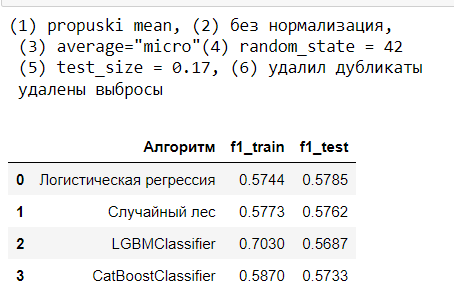

<font color='steelblue'><b>Комментарий кудесника:</b></font><br>
<font color='blue'> Пока лучший результат
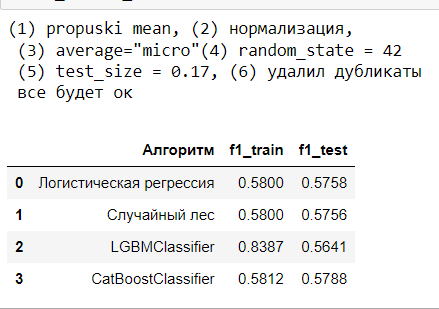
</font><br>

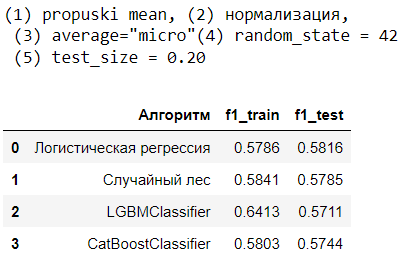

<font color='steelblue'><b>Комментарий кудесника:</b></font><br>
<font color='blue'> Пока лучший результат
 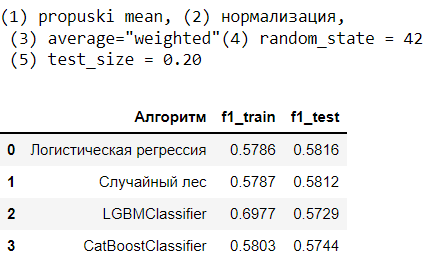
</font><br>



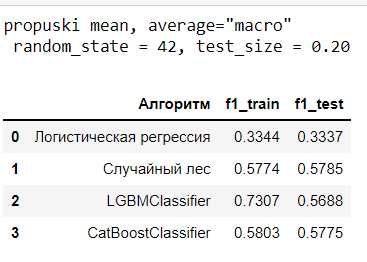

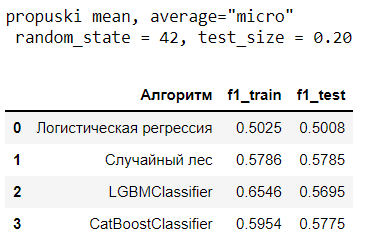

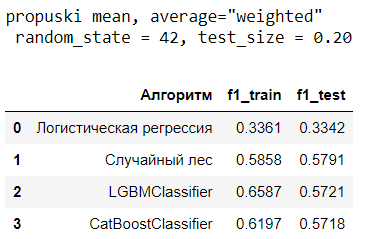

In [222]:
end = time.time()
exec_time(start,end)
import winsound
duration = 1000  # milliseconds
freq = 440  # Hz
winsound.Beep(freq, duration)

Время выполнения кода: 00:38:38


[&#10224;](#step13)

In [223]:
df = pred_log.merge(pred_for, on='Event', how='left')# методом merge объединякм таблицы 
df.head(3) 

,Event,Q2_x,Q2_y
0,100003381,-1,1
1,100042391,-1,1
2,100064781,-1,1


In [224]:
df = df.merge(pred_lg, on='Event', how='left')# методом merge объединякм таблицы 
df.head(3) 

,Event,Q2_x,Q2_y,Q2
0,100003381,-1,1,1
1,100042391,-1,1,-1
2,100064781,-1,1,1


In [225]:
df = df.merge(pred_cb, on='Event', how='left')# методом merge объединякм таблицы 
df.head(3)

,Event,Q2_x,Q2_y,Q2_x,Q2_y
0,100003381,-1,1,1,-1
1,100042391,-1,1,-1,-1
2,100064781,-1,1,1,1


In [226]:
df

,Event,Q2_x,Q2_y,Q2_x,Q2_y
0,100003381,-1,1,1,-1
1,100042391,-1,1,-1,-1
2,100064781,-1,1,1,1
3,100065292,-1,-1,-1,-1
4,1000680111,-1,-1,1,-1
...,...,...,...,...,...
14593,999130482,-1,1,-1,-1
14594,99928075,-1,1,1,1
14595,99947097,-1,1,-1,-1
14596,99949820,-1,-1,-1,-1


In [227]:
df.columns = ['Number','Q2_1', 'Q2_2', 'Q2_3', 'Q2_4']

In [228]:
df['Q2_1'].value_counts()

-1    13024
 1     1574
Name: Q2_1, dtype: int64

In [229]:
df['Сумма']  = df['Q2_1']+df['Q2_2']+df['Q2_3']+df['Q2_4']
df

,Number,Q2_1,Q2_2,Q2_3,Q2_4,Сумма
0,100003381,-1,1,1,-1,0
1,100042391,-1,1,-1,-1,-2
2,100064781,-1,1,1,1,2
3,100065292,-1,-1,-1,-1,-4
4,1000680111,-1,-1,1,-1,-2
...,...,...,...,...,...,...
14593,999130482,-1,1,-1,-1,-2
14594,99928075,-1,1,1,1,2
14595,99947097,-1,1,-1,-1,-2
14596,99949820,-1,-1,-1,-1,-4


<a id='step5'></a>
[***&#10224;***](#step13) <a class="tocSkip">

In [230]:
table_result_test

,Алгоритм,f1_train,f1_test
0,Логистическая регрессия,0.4100,0.4040
1,Случайный лес,0.5798,0.5749
2,LGBMClassifier,0.5801,0.5440
3,CatBoostClassifier,0.5801,0.5705


In [231]:
end = time.time()
import winsound
duration = 1000  # milliseconds
freq = 440  # Hz
winsound.Beep(freq, duration)

<a id='step6'></a>
[***&#10224;***](#step13) <a class="tocSkip">